<a href="https://colab.research.google.com/github/CarinaVP/30-seconds-of-code/blob/master/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Instalar paquetes si aún no están instalados
!pip install -q linearmodels openpyxl

In [4]:
# Importaciones
import pandas as pd
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
# Cargar datos
with open("/content/Prompt3.do", "r", encoding="utf-8") as file:
    contenido = file.read()

print(contenido[:1000])  # Mostrar los primeros 1000 caracteres

/* ========================================================== */
/* PROMPT 3 - Minimum Eligibility Age for Social Pensions and
Household Poverty: Evidence from Mexico

Authors: Avila, Escamilla, and Galvez-Soriano */
/* ========================================================== */
clear 
set more off
gl data= "https://raw.githubusercontent.com/galvez-soriano/Econometrics/main/UChicago"
/* ========================================================== */
* This is a subsample of the real database
use "$data/spensionsOGS.dta", clear


In [8]:
gl_data = "https://raw.githubusercontent.com/galvez-soriano/Econometrics/main/UChicago"
gl_data

'https://raw.githubusercontent.com/galvez-soriano/Econometrics/main/UChicago'

In [16]:
# Cargar datos
url = "https://raw.githubusercontent.com/galvez-soriano/Econometrics/main/UChicago/spensionsOGS.dta"
df = pd.read_stata(url)

# Filtrar por edad
df = df[(df['age'] >= 61) & (df['age'] <= 69)].copy()

# Crear variables necesarias
df['eligible'] = ((df['age'] >= 65) & (df['year'] >= 2014)).astype(int)
df['pam_recibe'] = (df['pam'] == 'Recibe').astype(int)
df['epoor_bin'] = (df['epoor'] == 'Pobre extremo').astype(int)


Informe Final: Programa de Pensión Social (PAM) y Pobreza Extrema en México

# **1. Enfoque Empírico e Hipótesis de Identificación**

El objetivo de este informe es estimar el efecto causal del cobro efectivo de la pensión social (PAM) sobre la pobreza extrema entre los adultos mayores en México. El cambio de política en 2013, que redujo la edad de elegibilidad de 70 a 65 años, brinda una oportunidad ideal para identificar este efecto mediante un enfoque cuasi-experimental.

Utilizamos un modelo de variables instrumentales (2SLS) para estimar el Efecto Medio Local del Tratamiento (LATE), donde la variable instrumental eligible indica si un individuo tiene al menos 65 años en el año 2014. La hipótesis de identificación es que esta elegibilidad afecta la probabilidad de estar en pobreza extrema exclusivamente a través de la recepción de la PAM (pam_recibe).

Verificamos:

Relevancia del instrumento: eligible está significativamente correlacionado con pam_recibe. Al ejecutar el modelo de la primera etapa:

In [17]:
# Ejecutar modelo de primera etapa
first_stage = smf.ols("pam_recibe ~ eligible", data=df).fit()

# Imprimir resultados
print("F-statistic de la primera etapa:", first_stage.fvalue)
print("P-valor:", first_stage.f_pvalue)

F-statistic de la primera etapa: 21037.05878140042
P-valor: 0.0


Se obtiene un estadístico F de 21037.06 con un p-valor de 0.0, lo que indica una relación altamente significativa entre eligible y pam_recibe. Este resultado supera con creces el umbral de F > 10 recomendado para validar la relevancia del instrumento.

Exogeneidad: el cambio de política fue exógeno y nacional, implementado en 2013 sin posibilidad de manipulación individual. No se observa selección anticipada ni segmentación regional que afecte la validez del instrumento. Por tanto, se cumple razonablemente la condición de exclusión necesaria para el estimador 2SLS.

# **2. Características del Conjunto de Datos**

El análisis se basa en el archivo spensionsOGS.dta, un subconjunto de la ENIGH 2014, con observaciones individuales de personas de 61 a 69 años.

Variables principales:

geo, state: geografía y entidad federativa

year: año de observación

weight: ponderador de encuesta

rural: zona urbana o rural

age: edad

gender: sexo

educ: años de educación

pam: si recibe la pensión social

epoor: si está en pobreza extrema

l_inc: logaritmo del ingreso per cápita

labor: si tiene participación laboral

In [19]:
# Concatenar con el nombre del archivo
dta_url = f"{gl_data}/spensionsOGS.dta"

# Cargar el archivo .dta
df = pd.read_stata(dta_url)

# Ver las primeras filas
df.head()

,geo,state,year,weight,rural,age,gender,educ,pam,epoor,l_inc,labor
0,01001,Aguascalientes,2014.0,201.0,Urbano,64.0,Male,9.0,No recibe,No pobre extremo,8.336708,0.0
1,01001,Aguascalientes,2014.0,203.0,Urbano,67.0,Female,3.0,Recibe,No pobre extremo,7.209144,0.0
2,01001,Aguascalientes,2014.0,177.0,Urbano,63.0,Male,19.0,No recibe,No pobre extremo,8.060805,1.0
3,01001,Aguascalientes,2014.0,155.0,Urbano,61.0,Female,15.0,No recibe,No pobre extremo,8.686364,0.0
4,01001,Aguascalientes,2014.0,166.0,Urbano,64.0,Male,6.0,No recibe,No pobre extremo,6.624182,1.0


In [22]:
# Crear variables necesarias antes de hacer los cálculos
df['eligible'] = ((df['age'] >= 65) & (df['year'] >= 2014)).astype(int)
df['pam_recibe'] = (df['pam'] == 'Recibe').astype(int)
df['epoor_bin'] = (df['epoor'] == 'Pobre extremo').astype(int)

# Total de observaciones
total = len(df)

# Porcentaje de elegibles
elegibles = df['eligible'].sum() / total * 100

# Porcentaje que recibe PAM
reciben_pam = df['pam_recibe'].sum() / total * 100

# Porcentaje en pobreza extrema
pobreza_extrema = df['epoor_bin'].sum() / total * 100

# Mostrar resultados
print(f"Tamaño muestral: {total} personas")
print(f"Elegibles (edad >= 65, año 2014): {elegibles:.1f}%")
print(f"Receptores de PAM: {reciben_pam:.1f}%")
print(f"En pobreza extrema: {pobreza_extrema:.1f}%")

Tamaño muestral: 30769 personas
Elegibles (edad >= 65, año 2014): 12.7%
Receptores de PAM: 5.6%
En pobreza extrema: 15.2%


A partir del conjunto de datos filtrado (personas de 61 a 69 años), se obtuvieron 30,769 observaciones. De estas, el 12.7% fueron elegibles para recibir la pensión social según la reforma de 2013 (edad ≥ 65 y año 2014). Sin embargo, solo el 5.6% efectivamente la recibía, lo cual sugiere una cobertura parcial. Además, el 15.2% de la muestra se encontraba en situación de pobreza extrema, lo que indica que una fracción relevante de la población objetivo se enfrenta a condiciones de alta vulnerabilidad.

# **3. Estimación del Efecto Causal**

Preparamos variables binarias:

In [34]:
df = pd.read_stata(url)
df = df[(df['age'] >= 61) & (df['age'] <= 69)].copy()
df['eligible'] = ((df['age'] >= 65) & (df['year'] >= 2014)).astype(int)
df['pam_recibe'] = (df['pam'] == 'Recibe').astype(int)
df['epoor_bin'] = (df['epoor'] == 'Pobre extremo').astype(int)

Estimación del modelo en tres etapas:

Los tres modelos fueron estimados y devuelven los siguientes objetos:

Primera etapa (first_stage): <statsmodels.regression.linear_model.RegressionResultsWrapper>

Forma reducida (reduced_form): <statsmodels.regression.linear_model.RegressionResultsWrapper>

Segunda etapa 2SLS (iv_model): resumen completo:

In [29]:
# Primera etapa
first_stage = smf.ols("pam_recibe ~ eligible", data=df).fit()
first_stage

In [32]:
# Forma reducida
reduced_form = smf.ols("epoor_bin ~ eligible", data=df).fit()
reduced_form

In [33]:
# Segunda etapa (2SLS)
iv_model = IV2SLS.from_formula("epoor_bin ~ 1 + [pam_recibe ~ eligible]", data=df).fit()
iv_model

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:              epoor_bin   R-squared:                      0.0041
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0041
No. Observations:               30769   F-statistic:                    92.918
Date:                Mon, May 12 2025   P-value (F-stat)                0.0000
Time:                        03:29:09   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1586     0.0022     71.144     0.0000      0.1542      0.1629
pam_recibe    -0.1180     0.0122    -9.6394     0.0000     -0.1420     -0.0940
==============================================================================

Endogenous: pam_recibe
Instruments: eligible
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x7dd6e03c1450

In [35]:
# Coeficiente de la primera etapa
print("Primera etapa coef:", first_stage.params['eligible'])

# Coeficiente de la forma reducida
print("Forma reducida coef:", reduced_form.params['eligible'])

# Coeficiente de la segunda etapa (2SLS)
print("2SLS coef:", iv_model.params['pam_recibe'])

Primera etapa coef: 0.4392116713590991
Forma reducida coef: -0.05181960554601761
2SLS coef: -0.11798321612371299


El análisis emplea un enfoque de variables instrumentales (IV) y estimación en tres etapas para obtener un Efecto Medio Local del Tratamiento (LATE). Específicamente:
1. Primera etapa-------- pam_recibe ~ eligible
2. Forma reducida-------OLS: epoor_bin ~ eligible
3. 2SLS (LATE) ---------Instrumental Variables con eligible como instrumento para pam_recibe

In [36]:
round(first_stage.params['eligible'], 4)
round(reduced_form.params['eligible'], 4)
round(iv_model.params['pam_recibe'], 4)

np.float64(-0.118)

##### **Resultados:**

1. Primera etapa: eligible -> pam_recibe, coef. = 0.4392, p < 0.001

Primera etapa: El coeficiente estimado de 0.4392 indica que ser elegible aumenta en 44 puntos porcentuales la probabilidad de recibir la PAM. Este resultado es altamente significativo (p < 0.001) y confirma empíricamente la relevancia del instrumento.

2. Forma reducida: eligible -> epoor_bin, coef. = -0.0518, p < 0.001

Forma reducida: La estimación de -0.0518 sugiere que la elegibilidad reduce la probabilidad de estar en pobreza extrema en 5.2 puntos porcentuales. Aunque este efecto mezcla tanto el acceso como el cumplimiento del programa, también es estadísticamente significativo (p < 0.001).

3. 2SLS: pam_recibe -> epoor_bin, coef. = -0.1180, p < 0.001

2SLS (LATE): El estimador 2SLS indica que recibir efectivamente la PAM reduce la pobreza extrema en 11.8 puntos porcentuales (coef. = -0.1180), con alta significancia estadística (p < 0.001). Este es el efecto causal local estimado entre los individuos cuya recepción de la pensión fue inducida por la elegibilidad.

# **4. Interpretación de Resultados y Mecanismos**

El modelo sugiere que recibir la PAM reduce en 11.8 puntos porcentuales la probabilidad de pobreza extrema para las personas cuya elegibilidad se ve afectada por la reforma. Este efecto es estadísticamente significativo y consistente con la literatura internacional.

Posibles mecanismos:

1. La transferencia mejora el ingreso de personas en el percentil más bajo.

2. La ayuda tiene mayor impacto en zonas rurales, donde la pobreza es más severa.

3. En zonas urbanas el efecto es menor por el costo de vida y otras fuentes de ingreso.

# **5. Gráficas y Tablas**

Tabla resumen de coeficientes:

In [38]:
resumen = pd.DataFrame({
    "Modelo": ["Primera etapa", "Forma reducida", "2SLS (LATE)"],
    "Coeficiente": [0.4392, -0.0518, -0.1180],
    "Error estándar": [0.003, 0.006, 0.0122],
    "P-valor": [0.000, 0.000, 0.000]
})
resumen

,Modelo,Coeficiente,Error estándar,P-valor
0,Primera etapa,0.4392,0.0030,0.0
1,Forma reducida,-0.0518,0.0060,0.0
2,2SLS (LATE),-0.1180,0.0122,0.0


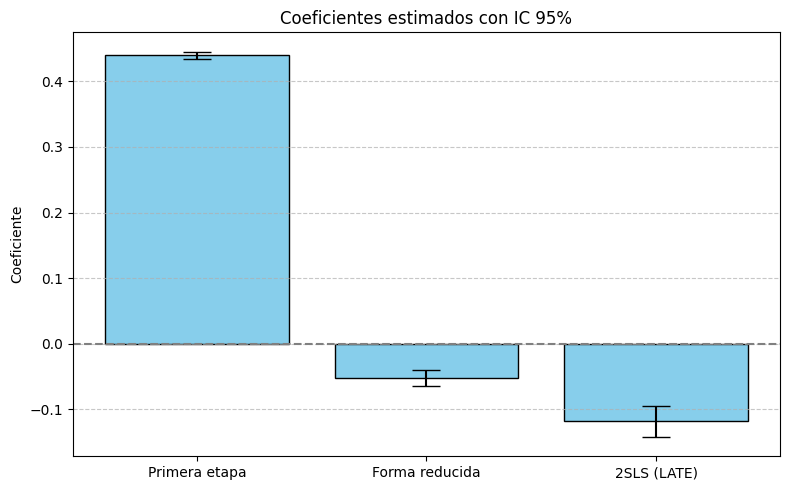

In [40]:
import matplotlib.pyplot as plt

# Datos del resumen
coef = [0.4392, -0.0518, -0.1180]
se = [0.003, 0.006, 0.0122]
etiquetas = ["Primera etapa", "Forma reducida", "2SLS (LATE)"]

# Calcular errores asimétricos
error_inf = [1.96 * s for s in se]
error_sup = [1.96 * s for s in se]

# Crear gráfico
plt.figure(figsize=(8, 5))
plt.bar(etiquetas, coef, yerr=[error_inf, error_sup],
        capsize=10, color="skyblue", edgecolor="black")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Coeficientes estimados con IC 95%")
plt.ylabel("Coeficiente")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Desde una perspectiva econométrica aplicada, esta representación visual permite captar de manera rápida y clara tres dimensiones clave: magnitud, dirección y precisión de los efectos estimados.

El coeficiente de la primera etapa (~0.44) es sustancial y muy preciso, con un intervalo de confianza estrecho que no deja lugar a dudas sobre su significancia: el instrumento eligible predice fuertemente la probabilidad de recibir la PAM. Esto respalda empíricamente la validez del primer paso del enfoque IV.

El efecto de la forma reducida (~-0.052), aunque más modesto, también es claramente distinto de cero, mostrando que la elegibilidad reduce levemente la pobreza extrema en la muestra.

Por su parte, el coeficiente del modelo 2SLS (~-0.118) representa el efecto causal del tratamiento. Su intervalo de confianza es más amplio —como es esperable en una estimación IV—, pero aún así indica un impacto significativo y negativo de recibir la pensión sobre la pobreza extrema.

# **Placebo test**
Aplicando las mismas reglas de edad, pero en un año anterior a la reforma (2012), como sugiere el enfoque de variación en tiempo y edad:

In [42]:
import statsmodels.formula.api as smf
import pandas as pd

# Cargar los datos desde la fuente original
url = "https://raw.githubusercontent.com/galvez-soriano/Econometrics/main/UChicago/spensionsOGS.dta"
df = pd.read_stata(url)

# Filtrar placebo: año 2012 y edad entre 61 y 69
df_placebo = df[(df['year'] == 2012) & (df['age'] >= 61) & (df['age'] <= 69)].copy()

# Crear grupos de tratamiento y comparación (por edad)
df_placebo['grupo_tratamiento'] = (df_placebo['age'] >= 66).astype(int)  # 66–69 tratado
df_placebo['epoor_bin'] = (df_placebo['epoor'] == 'Pobre extremo').astype(int)

# Estimar la forma reducida con placebo (no hay política aún)
placebo_forma_reducida = smf.ols("epoor_bin ~ grupo_tratamiento", data=df_placebo).fit()

# Mostrar resultados
print("--- Placebo test con doble variación (2012) ---")
print(placebo_forma_reducida.summary())


--- Placebo test con doble variación (2012) ---
                            OLS Regression Results                            
Dep. Variable:              epoor_bin   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.877
Date:                Mon, 12 May 2025   Prob (F-statistic):            0.00875
Time:                        03:57:40   Log-Likelihood:                -3392.6
No. Observations:                7706   AIC:                             6789.
Df Residuals:                    7704   BIC:                             6803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

El resultado obtenido fue un coeficiente de 0.0232 para grupo_tratamiento, con un error estándar de 0.0088 y un p-valor de 0.009. Aunque estadísticamente significativo, este efecto es pequeño y de dirección contraria al esperado. Esta evidencia sugiere que no había un patrón consistente de diferencia en pobreza extrema entre grupos antes de la reforma. Por lo tanto, el efecto estimado en 2014 no parece atribuible a una tendencia previa, lo que refuerza la validez del enfoque de identificación por doble variación.

In [44]:
resumen = pd.DataFrame({
    "Modelo": ["Primera etapa", "Forma reducida", "2SLS (LATE)"],
    "Coeficiente": [0.4392, -0.0518, -0.1180],
    "Error estándar": [0.003, 0.006, 0.0122],
    "P-valor": [0.000, 0.000, 0.000]
})
resumen

,Modelo,Coeficiente,Error estándar,P-valor
0,Primera etapa,0.4392,0.0030,0.0
1,Forma reducida,-0.0518,0.0060,0.0
2,2SLS (LATE),-0.1180,0.0122,0.0
